## Dimensionality Reduction

### The "curse" of dimensionality

The probability that a point selected in random will end up within a small distance `eps` from the boundary of a unit hypercube with `n` sides (or *dimensions*). 

In [1]:
def proba(n, eps=0.001, side=1):
  vol_cube=side**n
  vol_inner=(side-2*eps)**n
  vol_boundary=vol_cube-vol_inner
  p=vol_boundary/vol_cube
  return p*100

In [2]:
[proba(n) for n in range(1, 11)]

[0.20000000000000018,
 0.39959999999999996,
 0.5988007999999989,
 0.7976031983999987,
 0.9960079920032006,
 1.1940159760191915,
 1.391627944067153,
 1.5888446881790252,
 1.7856669988026597,
 1.9820956648050614]

In [3]:
[proba(n) for n in [100, 1_000, 10_000]]

[18.143319531157232, 86.49354775533166, 99.9999997979714]

In [4]:
import numpy as np

In [5]:
def dist(n, n_repeat=1_000):
  d=[]
  for i in range(n_repeat):
    a=np.random.rand(n)
    b=np.random.rand(n)
    d_ab=np.sqrt(((b-a)**2).sum())
    d.append(d_ab)
  d=np.array(d)
  return d.mean()

In [9]:
dist(3)

0.6600898975909436

In [10]:
dist(100)

4.073532861789817

In [7]:
# This cell takes about 20 sec to run
dist(1_000_000)

408.2577866986105

Data points in a high dimensional data set are far away from each other -- *sparsity*.

You can try increasing the number of features to reduce sparsity. For example, let's say you have 100 features (less than the number of features in the MNIST data set) and would like these features to be within 0.1 distance of each other. Roughly, you will need this many training instances:

In [9]:
(1/0.1)**100

1e+100

The number of atoms in the observable universe is smaller than that!

### PCA

In [10]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

X, y = mnist['data'], mnist['target'].astype(np.uint8)

In [11]:
X.shape

(70000, 784)

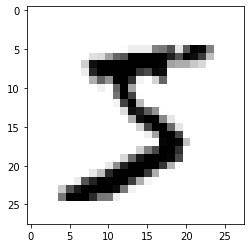

In [13]:
import matplotlib.pyplot as plt

img=X[0, :]
img=img.reshape((28, 28))
plt.imshow(img, cmap='binary')
plt.show()

In [14]:
from sklearn.decomposition import PCA

pca=PCA(n_components=0.95)
X95=pca.fit_transform(X)

In [15]:
pca.n_components_

154

In [16]:
X95.shape

(70000, 154)

In [17]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319358, 0.01279014, 0.01187272, 0.01152937,
       0.0106604 , 0.01009794, 0.00959151, 0.00909635, 0.00883287,
       0.00838818, 0.00809832, 0.00785718, 0.00740262, 0.00690014,
       0.00656144, 0.0064547 , 0.00600819, 0.00585612, 0.00566754,
       0.00543471, 0.00504717, 0.00487079, 0.00478955, 0.00467594,
       0.00454369, 0.00444918, 0.00418217, 0.00396164, 0.00383708,
       0.00375785, 0.00361426, 0.00349025, 0.00338732, 0.00319696,
       0.00316854, 0.00310145, 0.0029648 , 0.00287101, 0.00282514,
       0.00269423, 0.00268392, 0.00256509, 0.00253168, 0.00244648,
       0.00239702, 0.00238581, 0.00229234, 0.00220949, 0.0021306 ,
       0.00206317, 0.00202781, 0.00195035, 0.00191471, 0.0018855 ,
       0.00186976, 0.00180104, 0.00176787, 0.00173359, 0.00164

### PCA in a scikit-learn pipeline

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

In [19]:
%%time

sm_no_pca=Pipeline([
                    ('scaler', StandardScaler()),
                    ('smax', LogisticRegression(tol=100))
                    ])

sm_no_pca.fit(X_train, y_train)
y_pred_no_pca=sm_no_pca.predict(X_test)

print(accuracy_score(y_test, y_pred_no_pca))

0.9190952380952381
CPU times: user 14.1 s, sys: 1.43 s, total: 15.5 s
Wall time: 8.39 s


In [20]:
%%time

sm_pca=Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=0.95)),                 
                 ('smax', LogisticRegression(tol=100))
                 ])

sm_pca.fit(X_train, y_train)
y_pred_pca=sm_pca.predict(X_test)

print(accuracy_score(y_test, y_pred_pca))

0.9202380952380952
CPU times: user 29.9 s, sys: 3.5 s, total: 33.4 s
Wall time: 18.2 s


### Selecting the number of principal components

In [25]:
pca=PCA()
pca.fit(X, y)
var=pca.explained_variance_ratio_
len(var)

784

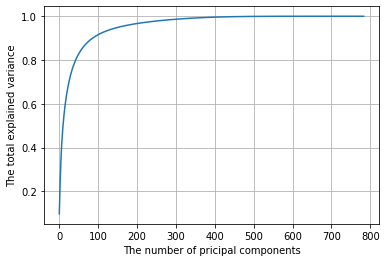

In [27]:
plt.plot(np.cumsum(var))
plt.xlabel("The number of pricipal components")
plt.ylabel("The total explained variance")
plt.grid()
plt.show()